In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint, simps, solve_ivp

ModuleNotFoundError: No module named 'numpy'

This is not the final method used to create the write up in this repo, but is given to demonsatrate the type of code written for the project.

In [ ]:
def wfn(U0,r, n, l, alpha, beta, mu, E):
    u,v= U0
    a = l*(l+1)
    b = 2*mu*E
    c = 2*mu*alpha
    d = 2*mu*beta
    
    V = -(4/3)*alpha/r + beta*2
    
    return [v,(a/r**2)*u -2*mu*(E-V)]


def Sqr(psi):
    pdf = np.zeros(psi.shape)
    for i in range(len(psi)):
        pdf[i] = abs(psi[i])**2
    return pdf

def Normalise(pdf, psi, v, r):
    norm = simps(pdf, r, even='first')
    iNorm = 1/norm
    riNorm = 1/np.sqrt(norm)
    pdf = pdf*iNorm
    psi = psi*riNorm
    v = v *riNorm
    
    return pdf, psi, v

def CountNodeTurn(u,v,r):
    nNodes = 0
    nTurns = 0
    for i in range(len(r) -1):
        crossUp = u[i] <= 0 and u[i+1] >= 0
        crossDown = u[i] >= 0 and u[i+1] <= 0
        
        turnUp = v[i] >= 0 and v[i+1] <= 0
        turnDown = v[i] <= 0 and v[i+1] >= 0
        if crossUp or crossDown:
            nNodes += 1
        if turnUp or turnDown:
            nTurns +=1
            
    return nNodes, nTurns

In [ ]:
def itera(n,l,U0, E1, E3, alpha, beta, mu, r):
    '''
        Iterates to find ur
    '''
    q = 0 
    i = 0
    while i == 0:
        if q > 1000:
            print("Iterative solution took too long to find")
            break
            
        if q%300 == 0 : print(q)
        E2 = (E1+E3)/2
        sol1 = odeint(wfn, U0, r, args=(1,0,alpha,beta, mu, E1))
        sol2 = odeint(wfn, U0, r, args=(1,0,alpha,beta, mu, E2))
        sol3 = odeint(wfn, U0, r, args=(1,0,alpha,beta, mu, E3))
        
        n1, t1 = CountNodeTurn(sol1[:,0], sol1[:,1], r)
        n2, t2 = CountNodeTurn(sol2[:,0], sol2[:,1], r)
        n3, t3 = CountNodeTurn(sol3[:,0], sol3[:,1], r)
        
        if n1 == (n-1) and t1 == (n):
            print ("Found iterative solution in",runs," iterations at E1 = ",E1)
            print("Nodes ", nodes1, "Turns ", turns1)
            finSol = sol1
            break
        elif n2 == (n-1) and t2 == (n):
            print("Nodes ", nodes2, "Turns ", turns2)
            print ("Found iterative solution in ", runs, " iterations at E1 = ",E2)
            finSol = sol2
            break
        elif n3 == (n-1) and t3 == (n):
            print ("Found iterative solution in ", runs, " iterations at E1 = ",E3)
            print("Nodes ", nodes3, "Turns ", turns3)
            finSol = sol3
            break
          
        if n3 != n2 or t3 != t2:
            E1 = E2
            q += 1
        if n1 != n2 or t1 != t2:
            E3 = E2
            q += 1
        else:
            q += 1
            
    return False

In [ ]:
#n,l,e,u0,cons1,cons3,d,mu,r
U0 = [0,1]
alpha = 0.4
beta = 0.195
mc = 1.34
M10 = 3.068
E10 = M10 - 2*mc
#mu = mc/2

invmu = 1/mc + 1/mc
mu = 1/invmu
r = np.linspace(0.0000001, 6, 10000)
#sol = itera(1,0,U0,0.2, 0.5, beta, mu, r)

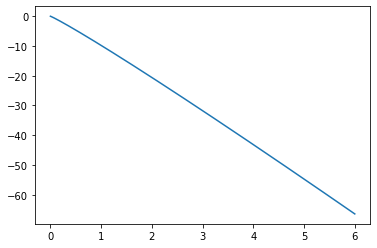

In [ ]:
U0 = [0,1]
sol = odeint(wfn, U0, r, args=(1,0,alpha,beta, mu, E10))
plt.plot(r, sol[:,0])

3.4031982421874993e-06


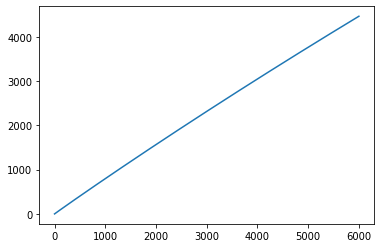

In [ ]:
U0 = [0,1]

mu = 0.511 #m_e in MeV
alpha = 1/137
beta = 0 

E10 = 1.3612870018543365e-05 #n,l = (1,0) energy
E20 = 3.4031982421874993e-06 
E21 = 3.4032287597656243e-06

E = E20
print(E)
r = np.linspace(0.000001, 6000, 1000)

n=1
l=0

sol = odeint(wfn, U0, r, args=(1,0,alpha,beta, mu, E10))
plt.plot(r, sol[:,0])

In [ ]:
#itera(n,l,U0, E1, E3, alpha, beta, mu, r)
#sol = itera(1,0,U0,0.3,0.5,alpha,beta,mu,r)
#if sol != False:
    #plt.plot(r, sol[:,0])

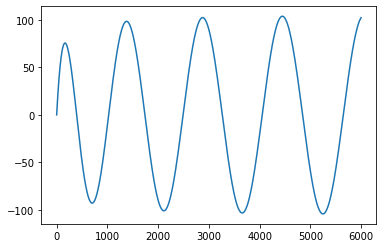

In [ ]:
alpha = 1/137 * 3/4
beta = 0
E = 13.6e-6
n = 1
l = 0
mu = 0.51099

def Potential(a, b, rad):
    return -(4/3)*a/rad + b*rad

def derivatives(r, U0, L, Mu, E):
    u,v = U0
    return[v, u*L*(L+1)/(r**2) - 2*Mu*u*(E-Potential(alpha, beta, r))]

y0 = [0,1]
z = solve_ivp(derivatives, [0.01, 6000], y0, vectorised = True, args = (l,mu,E), rtol = 1e-10, atol = 1e-10)
r = z.t
u = z.y[0]
v = z.y[1]

plt.plot(r,u)